IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

EDA

In [2]:
Startup=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/50_Startups.csv',)

In [3]:
Startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
Startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
Startup.rename(columns={'R&D Spend':'RDS','Marketing Spend':'MS','Administration':'AD'},inplace=True)

In [6]:
Startup.columns

Index(['RDS', 'AD', 'MS', 'State', 'Profit'], dtype='object')

In [7]:
Startup.describe()

,RDS,AD,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   AD      50 non-null     float64
 2   MS      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
Startup.isnull().sum()

RDS       0
AD        0
MS        0
State     0
Profit    0
dtype: int64

In [10]:
Startup.corr()

<ipython-input-10-c059110a82ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Startup.corr()


,RDS,AD,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


VISUALISATIONS

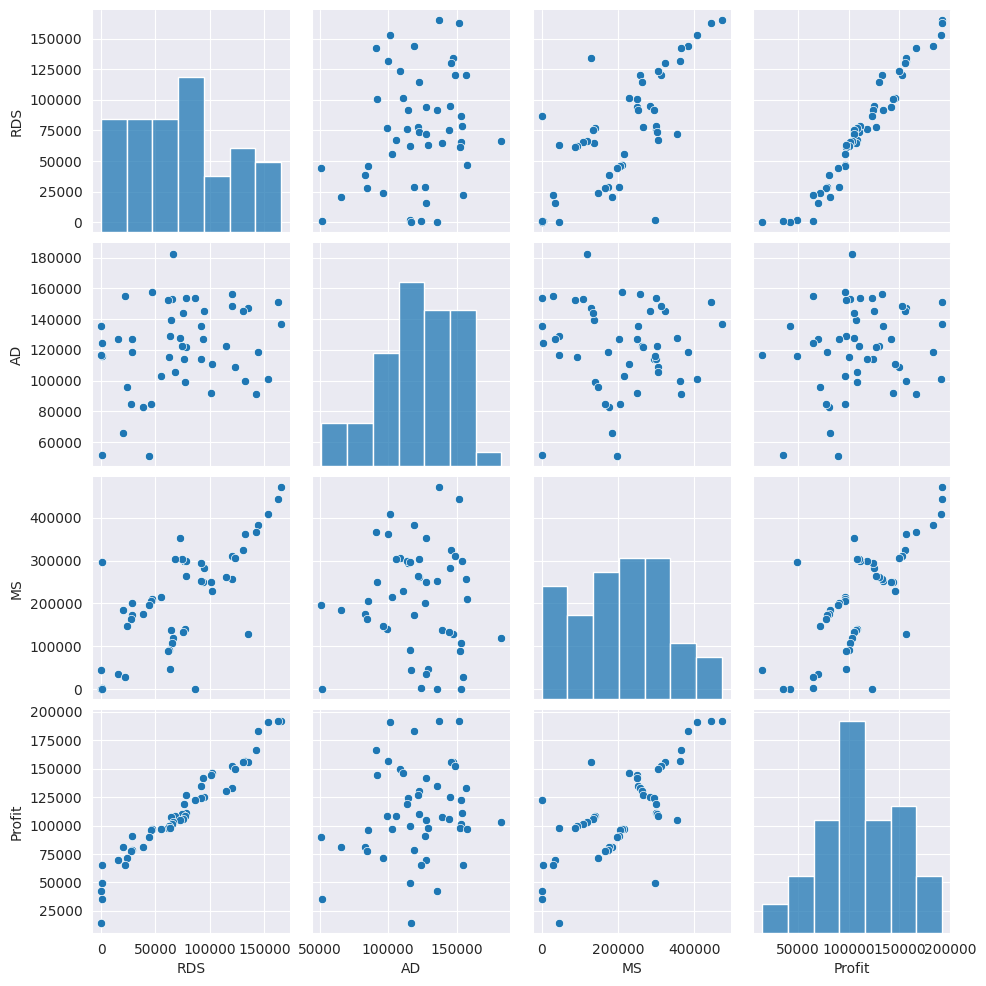

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(Startup)
plt.show()

<ipython-input-12-d370f4d7c858>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Startup.corr(),annot=True)


<Axes: >

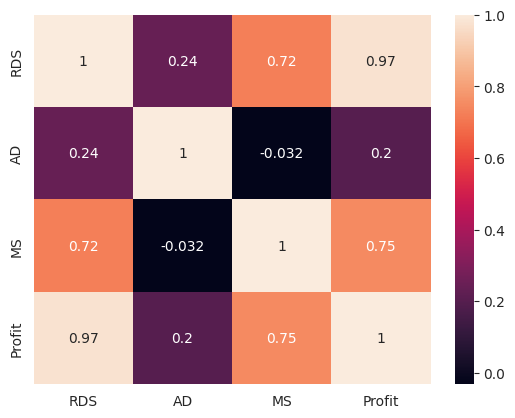

In [12]:
sns.heatmap(Startup.corr(),annot=True)

MODEL1(LINEAR MODEL)

In [16]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RDS+AD+MS',data=Startup).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        13:28:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
rsqLinear=model.rsquared
rsqLinear

0.9507459940683246

MODEL2(LOG MODEL)

In [22]:
import statsmodels.formula.api as smf
model_log=smf.ols('Profit~np.log(RDS+AD+MS)',data=Startup).fit()

In [23]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     97.00
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           4.16e-13
Time:                        13:29:18   Log-Likelihood:                -573.02
No. Observations:                  50   AIC:                             1150.
Df Residuals:                      48   BIC:                             1154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -7.24e+05   8.49e+04     -8.523      0.000   -8.95e+05   -5.53e+05
np.log(RDS + AD + MS)  6.525e+04   6624.974      9.849      0.000    5.19e+04    7.86e+04
==============================================================================
Omnibus:                        1.815   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                0.973
Skew:                          -0.186   Prob(JB):                        0.615
Kurtosis:                       3.574   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
rsqLog=model_log.rsquared
rsqLog

0.668967613655554

MODEL3(EXPONENTIAL MODEL)

In [25]:
import statsmodels.formula.api as smf
model_exp=smf.ols('np.log(Profit)~np.log(RDS+AD+MS)',data=Startup).fit()

In [26]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     85.69
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           2.98e-12
Time:                        13:36:39   Log-Likelihood:                -6.3476
No. Observations:                  50   AIC:                             16.70
Df Residuals:                      48   BIC:                             20.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1394      1.017      2.105      0.041       0.096       4.183
np.log(RDS + AD + MS)     0.7339      0.079      9.257      0.000       0.574       0.893
==============================================================================
Omnibus:                       52.308   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.206
Skew:                          -2.664   Prob(JB):                     4.78e-65
Kurtosis:                      13.667   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
rsqExp=model_exp.rsquared
rsqExp

0.6409683846992412

COMPARING MODELS BY RSQUARED VALUES

In [31]:
df=pd.DataFrame({'MODEL':pd.Series(["LInear","LOGARITHIMIC","EXPONENTIAL"]),
'RSQAURE':pd.Series([model.rsquared,model_log.rsquared,model_exp.rsquared])})

In [32]:
df

,MODEL,RSQAURE
0,LInear,0.950746
1,LOGARITHIMIC,0.668968
2,EXPONENTIAL,0.640968


MODEL DELETION DIAGNOSTICS

DETECTING OUTLIERS/INFLUENCERS

COOK'S DISTANCE

In [34]:
model_influence=model.get_influence()
(c, _)=model_influence.cooks_distance

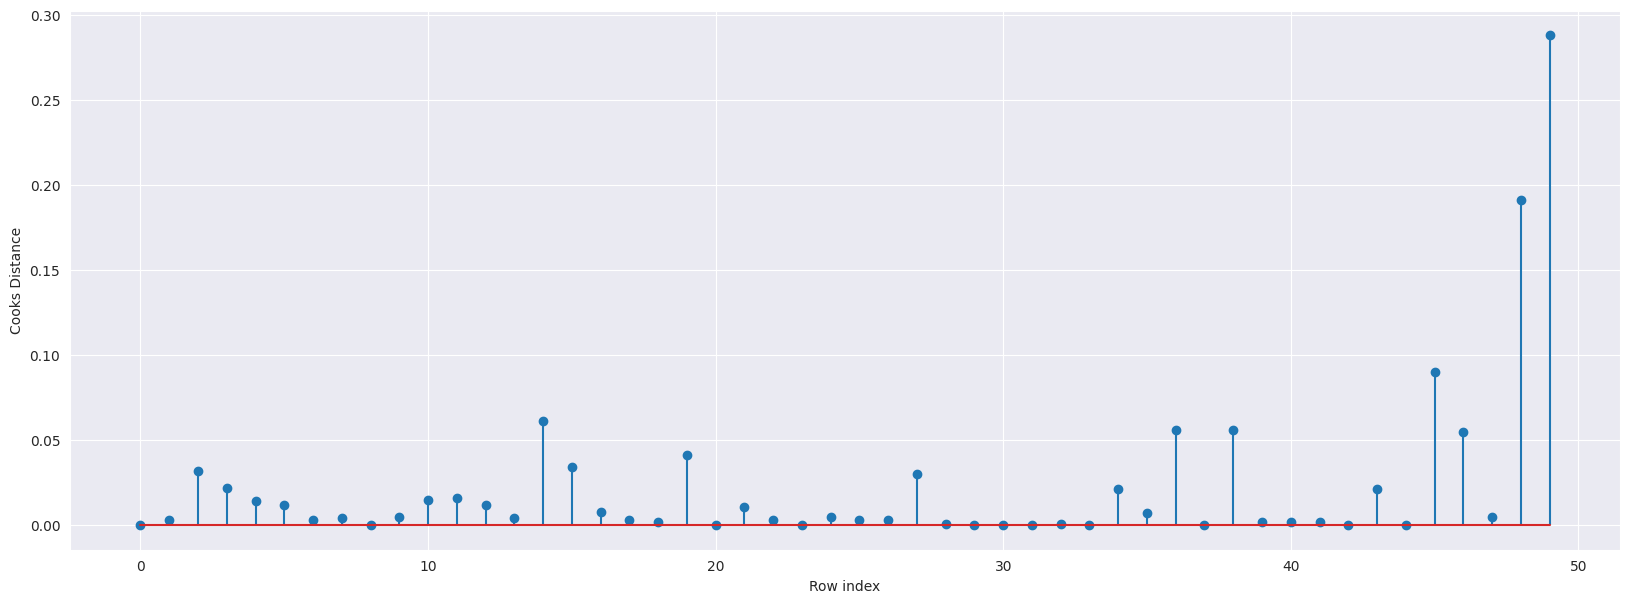

In [35]:
fig =plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

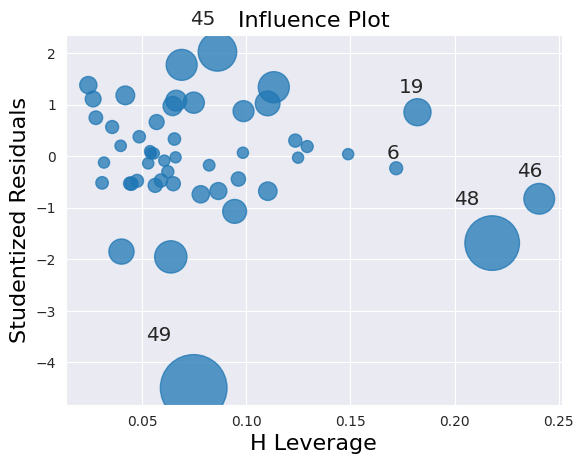

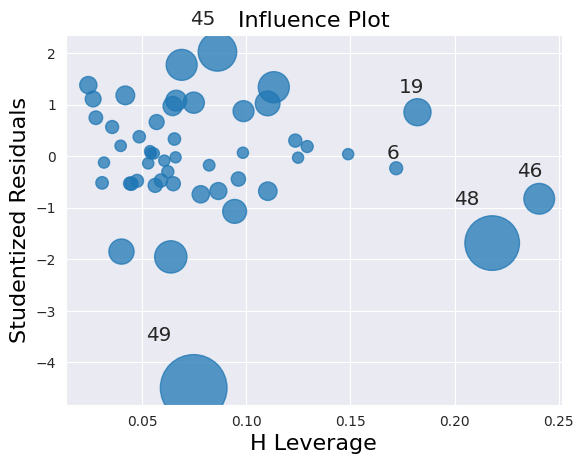

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [39]:
k=Startup.shape[1]
n=Startup.shape[0]
leverage_cutoff=(3*(k+1)/n)
leverage_cutoff

0.36

NO INFLUENCERS FOUND

IMPROVING MODEL

In [42]:
Startup50=Startup.drop(Startup.index[[49]],axis=0)
Startup50

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


FINAL MODEL

In [48]:
final_model=smf.ols('Profit~RDS+AD+MS',data=Startup50).fit()

In [49]:
final_model.rsquared

0.9613162435129847

In [50]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        14:08:20   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predictions

In [51]:
new_data=pd.DataFrame({'RDS':30,'AD':38500,'MS':90},index=[1])

In [52]:
final_model.predict(new_data)

1    51553.447748
dtype: float64

In [53]:
final_model.predict(Startup50.iloc[0:8,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
5    162582.583177
6    157741.338633
7    159347.735318
dtype: float64

In [54]:
pred_y=final_model.predict(Startup50)

In [55]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64